In [2]:
with open("./test4/acchamber2.log") as f:
    print f.readline()
    f.close()

[{"name": "temp1", "value": 20.5, "time": 1461130410.956896}, {"name": "humidity1", "value": 28.100000381469727, "time": 1461130410.956896}, {"name": "temp2", "value": 20.600000381469727, "time": 1461130411.486656}, {"name": "humidity2", "value": 30.0, "time": 1461130411.486656}, {"name": "temp3", "value": 20.600000381469727, "time": 1461130412.016656}, {"name": "humidity3", "value": 35.599998474121094, "time": 1461130412.016656}]



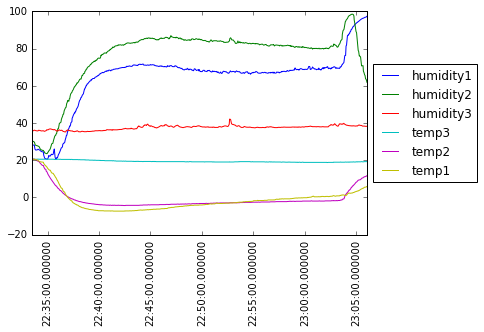

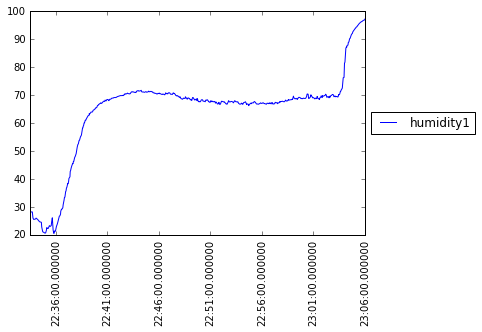

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pp

import numpy as np
import datetime
import json

with open("./test4/acchamber2.log") as f:
    # humidity1_time = np.array([])
    # humidity1_value = np.array([])
    # temperature1_time = np.array([])
    # temperature1_value = np.array([])
    # humidity2_time = np.array([])
    # humidity2_value = np.array([])
    # temperature2_time = np.array([])
    # temperature2_value = np.array([])
    # humidity3_time = np.array([])
    # humidity3_value = np.array([])
    # temperature3_time = np.array([])
    # temperature3_value = np.array([])
    
    sensors = {
        'temp1': [],
        'humidity1': [],
        'temp2': [],
        'humidity2': [],
        'temp3': [],
        'humidity3': []
    }
    
    
    for line in f:
        data = json.loads(line)
        
        for entry in data:
            record = {
                'value': entry['value'],
                'time': entry['time']
            }
            sensors[entry['name']].append(record)
            
    sensor_plots = {}
    
    for name, sensor_data in sensors.iteritems():
        sensor_plots[name] = {}
        sensor_plots[name]['time'] = []
        sensor_plots[name]['value'] = []
        for data in sensor_data:
            parsed_time = datetime.datetime.fromtimestamp(data['time'])
            sensor_plots[name]['time'].append(parsed_time)
            sensor_plots[name]['value'].append(data['value'])
        
f.close()

fig1 = plt.figure(1)
fig2 = plt.figure(2)
ax1 = fig1.add_subplot(1,1,1)
ax2 = fig2.add_subplot(1,1,1)
for key, value in sensor_plots.iteritems():
    ax1.plot(value['time'],value['value'], label=key)
    
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
ax2.plot(sensor_plots['humidity1']['time'],sensor_plots['humidity1']['value'], label='humidity1')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.setp(ax1.get_xticklabels(),rotation='vertical')
plt.setp(ax2.get_xticklabels(),rotation='vertical')

plt.show()

In [5]:
#!/usr/bin/env python

#
# See __doc__ for an explanation of what this module does
#
# See __usage__ for an explanation of runtime arguments.
#
# -Christopher Blunck
#

import sys, math

__author__ = 'Christopher Blunck'
__email__ = 'chris@wxnet.org'
__revision__ = '$Revision: 1.6 $'

__doc__ = 'temperature related conversionfunctions'
__usage__ = 'this module should not be run via the command line'



def celsius_to_fahrenheit(c):
    'Degrees Celsius (C) to degrees Fahrenheit (F)'
    return (c * 1.8) + 32.0

def celsius_to_kelvin(c):
    'Degrees Celsius (C) to degrees Kelvin (K)'
    return c + 273.15

def celsius_to_rankine(c):
    'Degrees Celsius (C) to degrees Rankine (R)'
    return (c * 1.8) + 491.67

def fahrenheit_to_celsius(f):
    'Degrees Fahrenheit (F) to degrees Celsius (C)'
    return (f - 32.0) * 0.555556

def fahrenheit_to_kelvin(f):
    'Degrees Fahrenheit (F) to degrees Kelvin (K)'
    return (f * 0.555556) + 255.37

def fahrenheit_to_rankine(f):
    'Degrees Fahrenheit (F) to degrees Rankine (R)'
    return f + 459.67

def kelvin_to_celsius(k):
    'Degrees Kelvin (K) to degrees Celsius (C)'
    return k - 273.15

def kelvin_to_fahrenheit(k):
    'Degrees Kelvin (K) to degrees Fahrenheit (F)'
    return (k - 255.37) * 1.8

def kelvin_to_rankine(k):
    'Degrees Kelvin (K) to degrees Rankine (R)'
    return k * 1.8

def rankine_to_celsius(r):
    'Degrees Rankine (R) to degrees Celsius (C)'
    return (r - 491.67) * 0.555556

def rankine_to_fahrenheit(r):
    'Degrees Rankine (R) to degrees Fahrenheit (F)'
    return r - 459.67

def rankine_to_kelvin(r):
    'Degrees Rankine (R) to degrees Kelvin (K)'
    return r * 0.555556


def calc_heat_index(temp, hum):
    '''
    calculates the heat index based upon temperature (in F) and humidity.
    http://www.srh.noaa.gov/bmx/tables/heat_index.html

    returns the heat index in degrees F.
    '''
    
    if (temp < 80):
        return temp
    else:
        return -42.379 + 2.04901523 * temp + 10.14333127 * hum - 0.22475541 * \
               temp * hum - 6.83783 * (10 ** -3) * (temp ** 2) - 5.481717 * \
               (10 ** -2) * (hum ** 2) + 1.22874 * (10 ** -3) * (temp ** 2) * \
               hum + 8.5282 * (10 ** -4) * temp * (hum ** 2) - 1.99 * \
               (10 ** -6) * (temp ** 2) * (hum ** 2);


def calc_wind_chill(t, windspeed, windspeed10min=None):
    '''
    calculates the wind chill value based upon the temperature (F) and
    wind.

    returns the wind chill in degrees F.
    '''

    w = max(windspeed10min, windspeed)
    return 35.74 + 0.6215 * t - 35.75 * (w ** 0.16) + 0.4275 * t * (w ** 0.16);


def calc_humidity(temp, dewpoint):
    '''
    calculates the humidity via the formula from weatherwise.org
    return the relative humidity
    '''

    t = fahrenheit_to_celsius(temp)
    td = fahrenheit_to_celsius(dewpoint)

    num = 112 - (0.1 * t) + td
    denom = 112 + (0.9 * t)

    rh = math.pow((num / denom), 8)
    
    return rh


def calc_dewpoint(temp, hum):
    '''
    calculates the dewpoint via the formula from weatherwise.org
    return the dewpoint in degrees F.
    '''

    c = fahrenheit_to_celsius(temp)
    x = 1 - 0.01 * hum;

    dewpoint = (14.55 + 0.114 * c) * x;
    dewpoint = dewpoint + ((2.5 + 0.007 * c) * x) ** 3;
    dewpoint = dewpoint + (15.9 + 0.117 * c) * x ** 14;
    dewpoint = c - dewpoint;

    return celsius_to_fahrenheit(dewpoint)

In [7]:

import math

def is_close(first, second, threshold):
    if not abs(first - second) <= threshold:
        print 'FALSE: %s is not %s close to %s' % (first, threshold, second)
    else:
        print 'TRUE: is %s close' % (threshold)
        
    return 

def calculate_dewpoint(temperature, relative_humidity):
    temperature = float(temperature)
    relative_humidity = float(relative_humidity)
    
    print temperature, relative_humidity
    rh = relative_humidity / 100
    log0 = math.log(rh)
    # LOL
    result = 243.04*(log0+((17.625*temperature)/(243.04+temperature)))/(17.625-log0-((17.625*temperature)/(243.04+temperature)))
    print result
    return result

temp_c = 12.8
rh_p = 65

dwp = calculate_dewpoint(temp_c, rh_p)
#r_dwp = 6.382647135
r_dwp = 6.38264713459
print 'dewpoint: %s' % dwp
# threshold of closeness
is_close(dwp, r_dwp, 0.00000000001)


import sys
import numpy as np
 
# approximation valid for
# 0 degC < T < 60 degC
# 1% < RH < 100%
# 0 degC < Td < 50 degC 
 
# constants
a = 17.271
b = 237.7 # degC


 
def dewpoint_approximation(T,RH):
    print T,RH
 
    Td = (b * gamma(T,RH)) / (a - gamma(T,RH))
 
    return Td
 
 
def gamma(T,RH):
 
    g = (a * T / (b + T)) + np.log(RH/100.0)
 
    return g
 
 
dwp = dewpoint_approximation(temp_c, rh_p)
print dwp
print 'dewpoint: %s' % dwp
is_close(dwp, r_dwp, 0.00000000001)


dwp = fahrenheit_to_celsius(calc_dewpoint(celsius_to_fahrenheit(temp_c), rh_p))
print dwp
print 'dewpoint: %s' % dwp
is_close(dwp, r_dwp, 0.00000000001)

def absolute_humidity(temp_c, dewpoint):
    temp_c = float(temp_c)
    dewpoint = float(dewpoint)
    result = ((0.21668*(pow((temp_c+273),-1)))*(pow((dewpoint+273),-4.9283))*(pow(10,(23.5518+(-2937.4/(dewpoint+273))))))*1000
    return result


ah = absolute_humidity(temp_c, calculate_dewpoint(temp_c, rh_p))
r_ah = 7.27874166749
close = abs(dwp - r_dwp)
is_close(ah, r_ah, 0.00000000001)



12.8 65.0
6.38264713459
dewpoint: 6.38264713459
TRUE: is 1e-11 close
12.8 65
6.38407927786
dewpoint: 6.38407927786
FALSE: 6.38407927786 is not 1e-11 close to 6.38264713459
6.45222345838
dewpoint: 6.45222345838
FALSE: 6.45222345838 is not 1e-11 close to 6.38264713459
12.8 65.0
6.38264713459
TRUE: is 1e-11 close


pddata
                             humidity1  humidity2  humidity3      temp1  \
2016-04-19- 22:33:30.956896  28.100000        NaN        NaN  20.500000   
2016-04-19- 22:33:31.486656        NaN  30.000000        NaN        NaN   
2016-04-19- 22:33:32.016656        NaN        NaN  35.599998        NaN   
2016-04-19- 22:33:33.608834  28.100000        NaN        NaN  20.500000   
2016-04-19- 22:33:37.324100        NaN  30.100000        NaN        NaN   
2016-04-19- 22:33:42.101022        NaN        NaN  36.099998        NaN   
2016-04-19- 22:33:42.636218  28.100000        NaN        NaN  20.500000   
2016-04-19- 22:33:43.698998        NaN  29.600000        NaN        NaN   
2016-04-19- 22:33:44.756648        NaN        NaN  36.099998        NaN   
2016-04-19- 22:33:46.358374  25.900000        NaN        NaN  20.400000   
2016-04-19- 22:33:47.944596        NaN  28.100000        NaN        NaN   
2016-04-19- 22:33:49.530615        NaN        NaN  35.900002        NaN   
2016-04-19- 22:33:

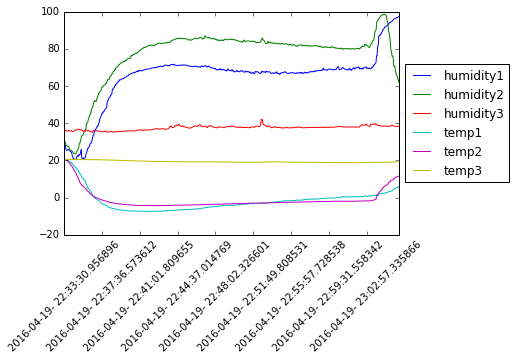

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import pp

import numpy as np
import datetime
import json

import pandas as pd

with open("./test4/acchamber2.log") as f:
    # humidity1_time = np.array([])
    # humidity1_value = np.array([])
    # temperature1_time = np.array([])
    # temperature1_value = np.array([])
    # humidity2_time = np.array([])
    # humidity2_value = np.array([])
    # temperature2_time = np.array([])
    # temperature2_value = np.array([])
    # humidity3_time = np.array([])
    # humidity3_value = np.array([])
    # temperature3_time = np.array([])
    # temperature3_value = np.array([])
    
    sensors = {
        'temp1': [],
        'humidity1': [],
        'temp2': [],
        'humidity2': [],
        'temp3': [],
        'humidity3': []
    }
    
    
    for line in f:
    # for line in range(200):
        # data = json.loads(f.readline())
        data = json.loads(line)
        pddata = pd.DataFrame()
        pseries = pd.Series()
        
        for entry in data:
            record = {
                'value': entry['value'],
                'time': entry['time']
            }
            sensors[entry['name']].append(record)
            
        #pddata = pd.DataFrame(sensors, index=sensors.keys())
     
    d = {}
    for name, value in sensors.iteritems():
        time = []
        data = []
        for ts_item in value:
            time.append(datetime.datetime.fromtimestamp(ts_item['time']).strftime('%Y-%m-%d- %H:%M:%S.%f'))
            data.append(ts_item['value'])
            
        d[name] = pd.Series(data, index=time)
        
    print 'pddata'
    pdata = pd.DataFrame(d)
    print pdata
    pdata.interpolate().plot(rot=45)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
        
f.close()